CS7641: Machine Learning
Timothy Geraghty (tgeraghty3)
Fall 2019

Dataset Intro:
Over the past several years, the shift of consumer spending from cash to credit cards has continued to rise as shoppers are opting for contactless low-value payments and online shopping. In the United Kingdom, three in every four pounds spent at retailers were on debit and credit cards. This figure is up 10% since 2009. As consumers turn from cash to credit cards, it is important to understand and identify fraudulent usage to protect consumers and minimize losses.

Every year billions of dollars of loss are a result of fraudulent credit card transactions. In order to combat these fraudulent transactions, it is paramount to design an efficient fraud detection algorithm focused on reducing losses. Analyzing this dataset is interesting and challenging because the distribution of data is heavily skewed. Of all the credit card transactions, only very slim percentage is fraudulent while a large majority is authentic. Developing a strong algorithm is important for machine learning researchers to study data sets that have highly skewed properties. If researchers are able to consistently identify behavior in a limited data set, there is a possibility for domain transfer to not require as much data when attempting to create algorithms for other problems.

The dataset used for this project is entitled Credit Card Fraud Detection Dataset and can be found at the following web address: https://www.kaggle.com/mlg-ulb/creditcardfraud.

In [1]:
# Decision Tree with pruning (may use GINI for information gain)
# Neural Network
# Boosting (implement boosted version of decision tree)
# SVM (do at least two kernels)
# k-nearest neighbors (test different values of k)

# Turn in 
# README.txt with instructions to run code
# tgeraghty3-analysis.pdf for writeup

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
import time

# Set random seed 
import random
random.seed(27)

# Plot inline
%matplotlib inline

In [50]:
# Create algorithms to use

# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Need to add pruning
def decision_tree(X, y):
    acc_train = []
    acc_test = []
    f1_train = []
    f1_test = [] 
    train_time = []
    test_time = []
    
    train_size = np.linspace(0.1,0.99,10)
    
    for n in train_size:
        test_n = 1 - n
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_n, random_state = 0)
        
        # Time training
        start = time.time()
    
        # Create Decision Tree classifier object
        clf = DecisionTreeClassifier(criterion='gini', max_depth = 5)
    
        # Train Decision Tree Classifier
        clf = clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
    
        # Stop training time
        train_time_n = time.time() - start
    
        # Start testing time
        start = time.time()
    
        y_pred_test = clf.predict(X_test)
        
        test_time_n = time.time() - start
    
        # Model accuracy
        acc_train_n = metrics.accuracy_score(y_train, y_pred_train)
        acc_test_n = metrics.accuracy_score(y_test, y_pred_test)
        acc_test_n = clf.score(X_test, y_test)
        f1_train_n = metrics.f1_score(y_train, y_pred_train, average='weighted', labels=np.unique(y_pred_train))
        f1_test_n = metrics.f1_score(y_test, y_pred_test, average='weighted', labels=np.unique(y_pred_test))
        
        acc_train.append(acc_train_n)
        acc_test.append(acc_test_n)
        f1_train.append(f1_train_n)
        f1_test.append(f1_test_n)
        train_time.append(train_time_n)
        test_time.append(test_time_n)
    
    return train_size, acc_train, acc_test, f1_train, f1_test, train_time, test_time

def ANN():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], init='uniform', activation='relu'))
    model.add(Dense(64, init='uniform', activation='relu'))
    model.add(Dense(64, init='uniform', activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    model.compile(loss='mse', optimizer='Adamax', metrics=['mse'])
    history = model.fit(X_train, y_train, epochs=5000, batch_size=50,  verbose=0, validation_split=0.2)
    
    results=model.predict(X_test)
    score1 = metrics.mean_squared_error(y_test,results )
    score2 = metrics.r2_score(y_test,results )
    return score1, score2

def boosting(X, y):
    acc_train = []
    acc_test = []
    f1_train = []
    f1_test = [] 
    train_time = []
    test_time = []
    
    train_size = np.linspace(0.1,0.99,10)
    
    for n in train_size:
        test_n = 1 - n
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_n, random_state = 0)
        
        # Time training
        start = time.time()
    
        # Create Decision Tree classifier object
        clf = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'gini', max_depth = 5), algorithm = 'SAMME', n_estimators = 40, learning_rate = 0.35)

        # Train Decision Tree Classifier
        clf = clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
    
        # Stop training time
        train_time_n = time.time() - start
    
        # Start testing time
        start = time.time()
    
        y_pred_test = clf.predict(X_test)
        
        test_time_n = time.time() - start
    
        # Model accuracy
        acc_train_n = metrics.accuracy_score(y_train, y_pred_train)
        acc_test_n = metrics.accuracy_score(y_test, y_pred_test)
        acc_test_n = clf.score(X_test, y_test)
        f1_train_n = metrics.f1_score(y_train, y_pred_train, average='weighted', labels=np.unique(y_pred_train))
        f1_test_n = metrics.f1_score(y_test, y_pred_test, average='weighted', labels=np.unique(y_pred_test))
        
        acc_train.append(acc_train_n)
        acc_test.append(acc_test_n)
        f1_train.append(f1_train_n)
        f1_test.append(f1_test_n)
        train_time.append(train_time_n)
        test_time.append(test_time_n)
    
    return train_size, acc_train, acc_test, f1_train, f1_test, train_time, test_time

def SVM(X, y):
    acc_train = []
    acc_test = []
    f1_train = []
    f1_test = [] 
    train_time = []
    test_time = []
    
    train_size = np.linspace(0.1,0.99,10)
    
    for n in train_size:
        test_n = 1 - n
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_n, random_state = 0)
        
        # Time training
        start = time.time()
    
        # Create Decision Tree classifier object
        clf = SVC(kernel = 'rbf', C = 125, gamma = 2)
        
        # Train Decision Tree Classifier
        clf = clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
    
        # Stop training time
        train_time_n = time.time() - start
    
        # Start testing time
        start = time.time()
    
        y_pred_test = clf.predict(X_test)
        
        test_time_n = time.time() - start

        # Model accuracy
        acc_train_n = metrics.accuracy_score(y_train, y_pred_train)
        acc_test_n = metrics.accuracy_score(y_test, y_pred_test)
        acc_test_n = clf.score(X_test, y_test)
        f1_train_n = metrics.f1_score(y_train, y_pred_train, average='weighted', labels=np.unique(y_pred_train))
        f1_test_n = metrics.f1_score(y_test, y_pred_test, average='weighted', labels=np.unique(y_pred_test))
        
        acc_train.append(acc_train_n)
        acc_test.append(acc_test_n)
        f1_train.append(f1_train_n)
        f1_test.append(f1_test_n)
        train_time.append(train_time_n)
        test_time.append(test_time_n)
    
    return train_size, acc_train, acc_test, f1_train, f1_test, train_time, test_time

def kNN(X, y):
    acc_train = []
    acc_test = []
    f1_train = []
    f1_test = [] 
    train_time = []
    test_time = []
    
    train_size = np.linspace(0.1,0.99,10)
    
    for n in train_size:
        test_n = 1 - n
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_n, random_state = 0)
        
        # Time training
        start = time.time()
    
        # Create Decision Tree classifier object
        clf = KNeighborsClassifier(algorithm = 'kd_tree', weights = 'uniform', n_neighbors = 60)
        
        # Train Decision Tree Classifier
        clf = clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
    
        # Stop training time
        train_time_n = time.time() - start
    
        # Start testing time
        start = time.time()
    
        y_pred_test = clf.predict(X_test)
        
        test_time_n = time.time() - start

        # Model accuracy
        acc_train_n = metrics.accuracy_score(y_train, y_pred_train)
        acc_test_n = metrics.accuracy_score(y_test, y_pred_test)
        acc_test_n = clf.score(X_test, y_test)
        f1_train_n = metrics.f1_score(y_train, y_pred_train, average='weighted', labels=np.unique(y_pred_train))
        f1_test_n = metrics.f1_score(y_test, y_pred_test, average='weighted', labels=np.unique(y_pred_test))
        
        acc_train.append(acc_train_n)
        acc_test.append(acc_test_n)
        f1_train.append(f1_train_n)
        f1_test.append(f1_test_n)
        train_time.append(train_time_n)
        test_time.append(test_time_n)
    
    return train_size, acc_train, acc_test, f1_train, f1_test, train_time, test_time



In [44]:
# Dataset 1: Online News Popularity
# Source: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

# Load dataset
data = pd.read_csv('creditcard.csv', header = 0)
# Remove leading and trailing white space in column headers
data = data.rename(columns=lambda x: x.strip())

# Describe the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


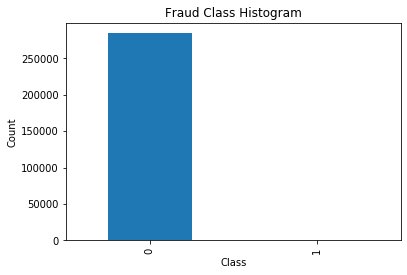

Fraud transactions:  492
Authentic transactions:  284315


In [45]:
#Create a histogram to view the distribution between classes in the dataset
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar')
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#Calculate the number of authentic transactions and fraudulent transactions in the dataset
n_fraud= len(data[data["Class"]==1])
n_auth = len(data[data["Class"]==0])
print("Fraud transactions: ", n_fraud)
print("Authentic transactions: ", n_auth)

In [46]:
#We have to scale the Amount feature before fitting our model to our dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data["scaled_amount"] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

#dropping time and old amount column
data= data.drop(["Time","Amount"], axis= 1)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [47]:
#list of fraud indices
fraud_index= np.array(data[data["Class"]==1].index)

#getting the list of normal indices from the full dataset
auth_index= data[data["Class"]==0].index

#choosing random normal indices equal to the number of fraudulent transactions
random_auth_indices= np.random.choice(auth_index, n_fraud, replace= False)
random_auth_indices= np.array(random_auth_indices)

# concatenate fraud index and normal index to create a list of indices
undersampled_indices= np.concatenate([fraud_index, random_auth_indices])

#use the undersampled indices to build the undersampled_data dataframe
undersampled_data= data.iloc[undersampled_indices, :]

undersampled_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [48]:
# Construct an unbalanced subset of data
unbalanced_data = data.sample(2000)
n_frauds= len(unbalanced_data[unbalanced_data["Class"]==1])
print(n_frauds)

3


Fraud transactions:  492
Authentic transactions:  492
The total number of rows of both classes are:  984


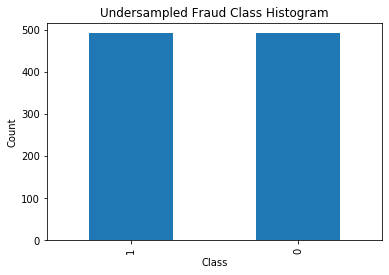

In [49]:
#count the number of fraudulent and authentic instances in the undersampled dataset
n_auth_sampled = len(undersampled_data[undersampled_data["Class"]== 0])
n_fraud_sampled= len(undersampled_data[undersampled_data["Class"]== 1])

#Check the data count now and plot the distribution 
count_sampled=pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar')
plt.title("Undersampled Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Count")

print("Fraud transactions: ", n_fraud_sampled)
print("Authentic transactions: ", n_auth_sampled)
total_sampled= n_fraud_sampled + n_auth_sampled
print("The total number of rows of both classes are: ", total_sampled)

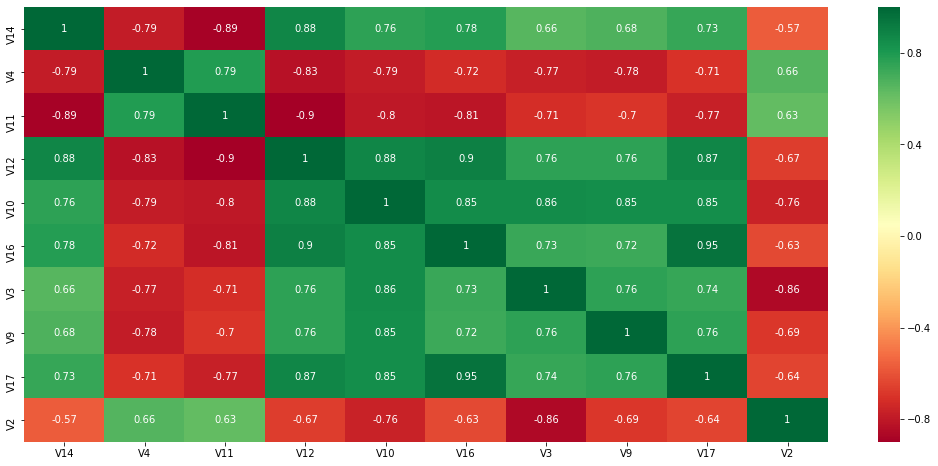

In [10]:
# Feature selection
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# https://people.duke.edu/~rnau/rsquared.htm

# Correlation Analysis
df_corr = abs(undersampled_data.corr())
df_corr = df_corr['Class']
df_corr = pd.DataFrame(df_corr.values, undersampled_data.columns).reset_index()
df_corr.columns = ['Feature', 'Corr']
df_corr = df_corr[df_corr['Corr'] > 0.06]
df_corr = df_corr.sort_values(by='Corr', ascending=False)[1:]
df_corr = df_corr.head(10)
#df_corr

# Univariate Analysis
y_bal = undersampled_data['Class']
X_bal = undersampled_data.drop(['Class'], axis=1)
y_unbal = unbalanced_data['Class']
X_unbal = unbalanced_data.drop(['Class'], axis=1)

bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X_bal,y_bal)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_bal.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False).head(20)
#featureScores

# Determine overlap between features
idx1 = pd.Index(df_corr['Feature'])
idx2 = pd.Index(featureScores['Specs'])
features_list = idx1.intersection(idx2)
#features_list

# Create heatmap to show overlap features
X1 = X_bal[features_list]
plt.subplots(1,1,figsize=(18,8))
sns.heatmap(X1.corr(),annot=True,cmap="RdYlGn")


In [11]:
# Remove highly correlated (redundant) features to maximize information gain
features_to_remove = ['V16','V17']
lst = list(features_list.values)
selected_features = [e for e in lst if e not in features_to_remove]

selected_features 

['V14', 'V4', 'V11', 'V12', 'V10', 'V3', 'V9', 'V2']

In [12]:
#Split the dataset between the features (X) and target variable (y)
from sklearn.preprocessing import MinMaxScaler
X_bal = X_bal[selected_features]
X_unbal = X_unbal[selected_features]

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_bal)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_bal)

X_bal = scaling.transform(X_bal)
X_unbal = scaling.transform(X_unbal)

y_bal = y_bal
y_unbal = y_unbal

#Train, Test, Split the dataset to get the training data with a test size of 0.3
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bal,y_bal,test_size = 0.3, random_state = 0)
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X_unbal,y_unbal,test_size = 0.3, random_state = 0)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

print("Number of articles train dataset: ", len(Xb_train))
print("Number of article test dataset: ", len(Xb_test))
print("Total number of articles: ", len(Xb_train)+len(Xb_test))

Number of articles train dataset:  688
Number of article test dataset:  296
Total number of articles:  984


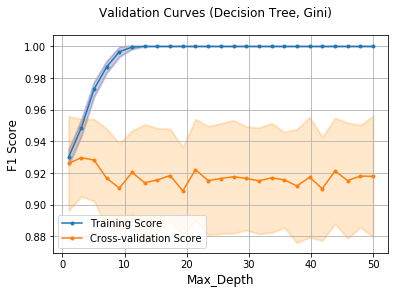

In [13]:
####################
## Decision Trees ##
####################

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

# Validation Curve: Max_Depth
param_range = np.linspace(1, 50, 25)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(criterion='gini'), Xb_train, yb_train, param_name="max_depth", param_range=param_range, cv=7, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, Gini)', fontsize=12)
plt.xlabel('Max_Depth', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

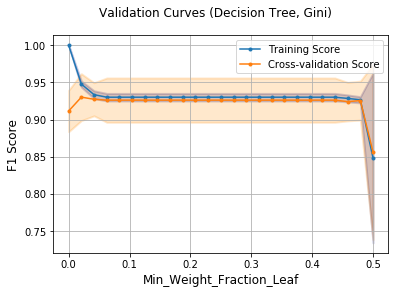

In [14]:
# Validation Curve: min_weight_fraction_leaf
param_range = np.linspace(0, 0.5, 25)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(criterion='gini'), Xb_train, yb_train, param_name="min_weight_fraction_leaf", param_range=param_range, cv=7, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, Gini)', fontsize=12)
plt.xlabel('Min_Weight_Fraction_Leaf', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

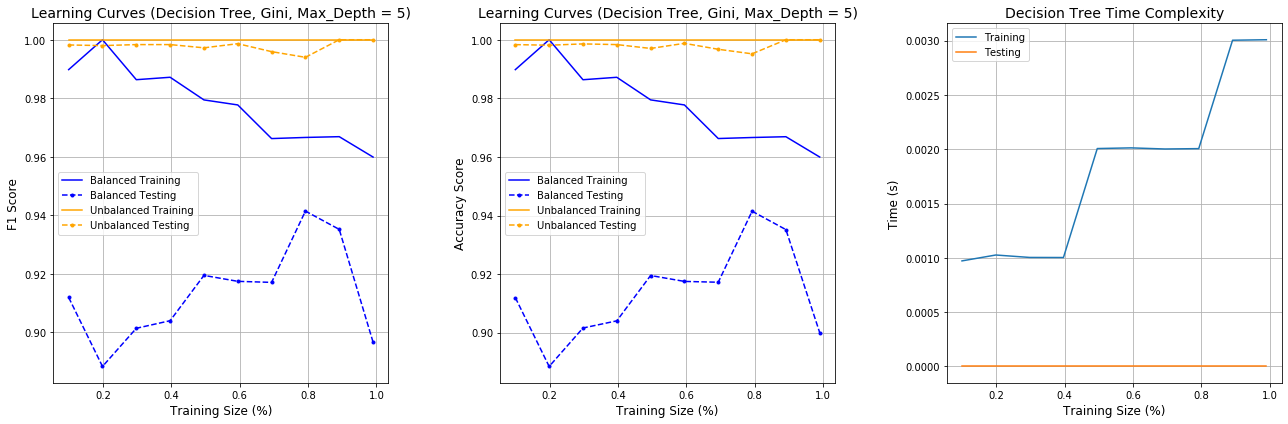

In [15]:
train_size, accb_train, accb_test, f1b_train, f1b_test, trainb_time, testb_time = decision_tree(X_bal, y_bal)
train_size, accu_train, accu_test, f1u_train, f1u_test, trainu_time, testb_time = decision_tree(X_unbal, y_unbal)

fig = plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(train_size, f1b_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, f1b_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, f1u_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, f1u_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (Decision Tree, Gini, Max_Depth = 5)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,2)
plt.plot(train_size, accb_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, accb_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, accu_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, accu_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (Decision Tree, Gini, Max_Depth = 5)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,3)
plt.plot(train_size, trainb_time, label = 'Training')
plt.plot(train_size, testb_time, label = 'Testing')
plt.title('Decision Tree Time Complexity', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

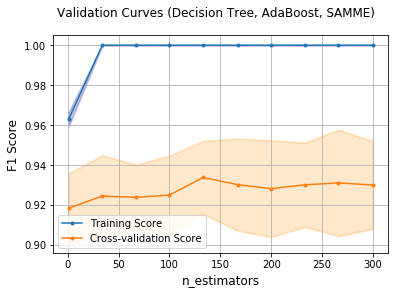

In [51]:
#####################
##### Boosting ######
#####################

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    
# Validation Curve: n_estimators
param_range = np.linspace(1, 300, 10, dtype = int)
train_scores, valid_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, criterion = 'gini'), algorithm = 'SAMME'), X_bal, y_bal, param_name="n_estimators", param_range=param_range, cv=5, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, AdaBoost, SAMME)', fontsize=12)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

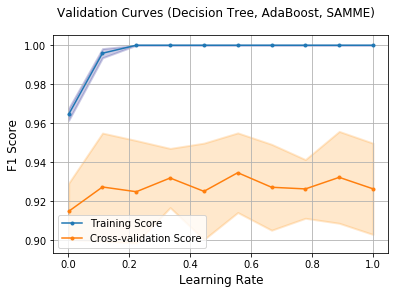

In [17]:
# Validation Curve: learning rate
param_range = np.linspace(0.001, 1, 10, dtype=float)
train_scores, valid_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, criterion = 'gini'), algorithm = 'SAMME'), X_bal, y_bal, param_name="learning_rate", param_range=param_range, cv=5, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, AdaBoost, SAMME)', fontsize=12)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

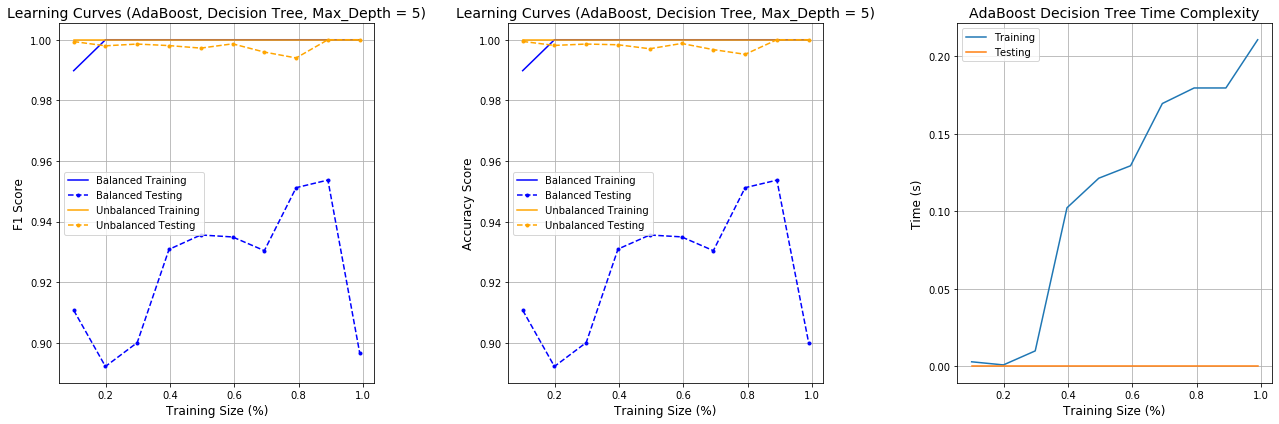

In [18]:
# AdaBoost Learning Curve
train_size, accb_train, accb_test, f1b_train, f1b_test, trainb_time, testb_time = boosting(X_bal, y_bal)
train_size, accu_train, accu_test, f1u_train, f1u_test, trainu_time, testb_time = boosting(X_unbal, y_unbal)

fig = plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(train_size, f1b_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, f1b_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, f1u_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, f1u_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (AdaBoost, Decision Tree, Max_Depth = 5)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,2)
plt.plot(train_size, accb_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, accb_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, accu_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, accu_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (AdaBoost, Decision Tree, Max_Depth = 5)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,3)
plt.plot(train_size, trainb_time, label = 'Training')
plt.plot(train_size, testb_time, label = 'Testing')
plt.title('AdaBoost Decision Tree Time Complexity', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

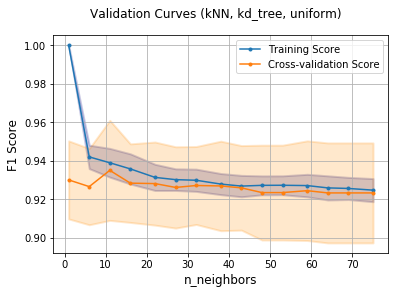

In [19]:
####################
####### kNN ########
####################

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
# Validation Curve: 
param_range = np.linspace(1, 75, 15, dtype = int)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(algorithm = 'kd_tree', weights = 'uniform'), X_bal, y_bal, param_name="n_neighbors", param_range=param_range, cv=5, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (kNN, kd_tree, uniform)', fontsize=12)
plt.xlabel('n_neighbors', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

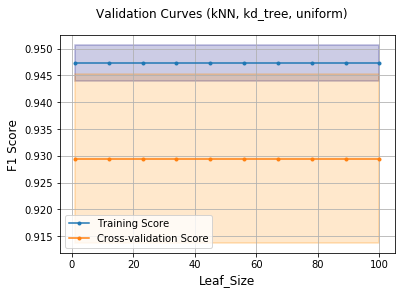

In [20]:
# Validation Curve: min_weight_fraction_leaf
param_range = np.linspace(1, 100, 10, dtype=int)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(algorithm = 'kd_tree', weights = 'uniform'), X_bal, y_bal, param_name="leaf_size", param_range=param_range, cv=5, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (kNN, kd_tree, uniform)', fontsize=12)
plt.xlabel('Leaf_Size', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

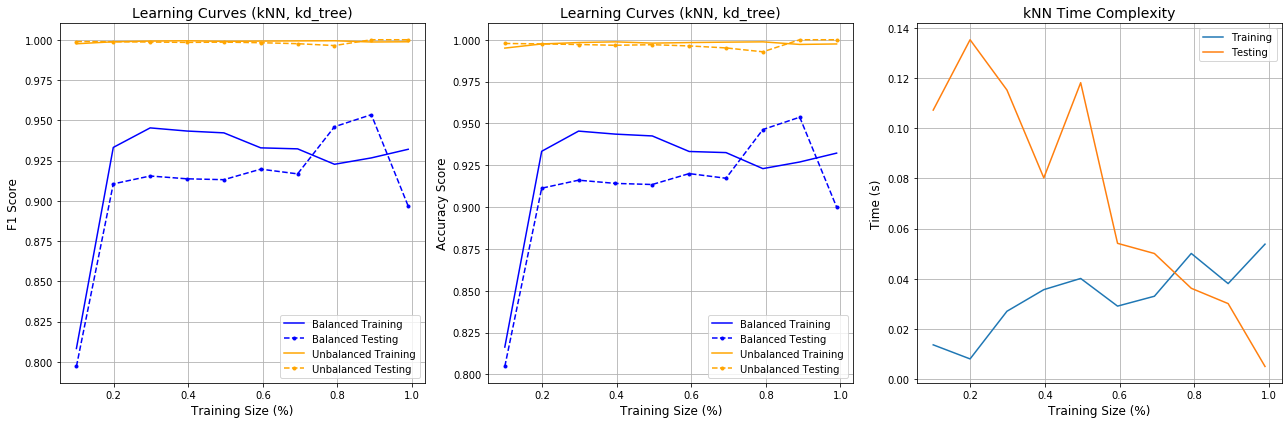

In [52]:
# KNN Learning Curve
train_size, accb_train, accb_test, f1b_train, f1b_test, trainb_time, testb_time = kNN(X_bal, y_bal)
train_size, accu_train, accu_test, f1u_train, f1u_test, trainu_time, testb_time = kNN(X_unbal, y_unbal)

fig = plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(train_size, f1b_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, f1b_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, f1u_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, f1u_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (kNN, kd_tree)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,2)
plt.plot(train_size, accb_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, accb_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, accu_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, accu_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (kNN, kd_tree)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,3)
plt.plot(train_size, trainb_time, label = 'Training')
plt.plot(train_size, testb_time, label = 'Testing')
plt.title('kNN Time Complexity', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

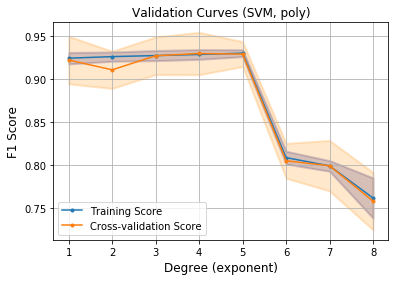

In [22]:
####################
####### SVM ########
####################

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    
# Validation Curve: Poly
# Balanced dataset
param_range = np.linspace(1,8, 8, dtype = int)
train_scores, valid_scores = validation_curve(SVC(kernel = 'poly', gamma = 'auto'), X_bal, y_bal, param_name="degree", param_range=param_range, cv=5, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.title('Validation Curves (SVM, poly)')
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.xlabel('Degree (exponent)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

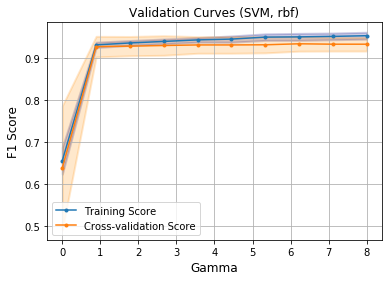

In [23]:
# Validation Curve: rbf
param_range = np.linspace(0.001, 8, 10, dtype=float)
train_scores, valid_scores = validation_curve(SVC(kernel = 'rbf'), X_bal, y_bal, param_name="gamma", param_range=param_range, cv=5, scoring="f1", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
   
lw=2

fig = plt.figure()
plt.title('Validation Curves (SVM, rbf)')
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.xlabel('Gamma', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

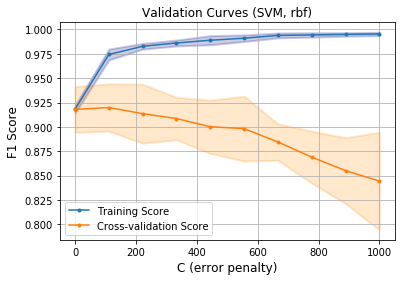

In [24]:
# Validation Curve: rbf, vary C
param_range = np.linspace(0.001, 1000, 10, dtype=float)
train_scores, valid_scores = validation_curve(SVC(kernel = 'rbf', gamma = 3), X_bal, y_bal, param_name="C", param_range=param_range, cv=5, scoring="f1", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.title('Validation Curves (SVM, rbf)')
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.xlabel('C (error penalty)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()

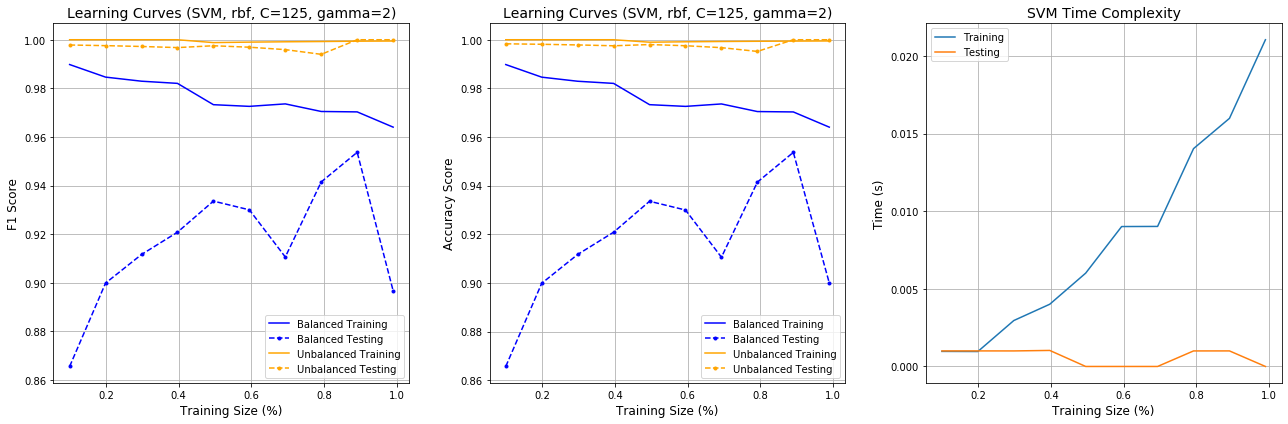

In [25]:
# Learning Curve for SVM
# KNN Learning Curve
train_size, accb_train, accb_test, f1b_train, f1b_test, trainb_time, testb_time = SVM(X_bal, y_bal)
train_size, accu_train, accu_test, f1u_train, f1u_test, trainu_time, testb_time = SVM(X_unbal, y_unbal)

fig = plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(train_size, f1b_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, f1b_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, f1u_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, f1u_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (SVM, rbf, C=125, gamma=2)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,2)
plt.plot(train_size, accb_train, label = 'Balanced Training', color = 'blue')
plt.plot(train_size, accb_test, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(train_size, accu_train, label = 'Unbalanced Training', color = 'orange')
plt.plot(train_size, accu_test, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.title('Learning Curves (SVM, rbf, C=125, gamma=2)', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(1,3,3)
plt.plot(train_size, trainb_time, label = 'Training')
plt.plot(train_size, testb_time, label = 'Testing')
plt.title('SVM Time Complexity', fontsize=14)
plt.xlabel('Training Size (%)', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

W0921 01:22:30.071719  8056 deprecation_wrapper.py:119] From C:\Users\tg784d\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
W0921 01:22:30.085781  8056 deprecation_wrapper.py:119] From C:\Users\tg784d\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0921 01:22:30.087730  8056 deprecation_wrapper.py:119] From C:\Users\tg784d\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:13: Use

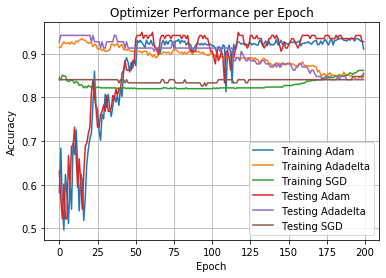

In [26]:
####################
####### ANN ########
####################

#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
#https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
#for act in ['relu', 'sigmoid']:

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=Xb_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model_adam = model
model_adadelta = model
model_sgd = model
model_adam.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model_adadelta.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
model_sgd.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])


# Fit the model
#history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
history_adam = model_adam.fit(Xb_train, yb_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
history_adadelta = model_adadelta.fit(Xb_train, yb_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
history_sgd = model_adadelta.fit(Xb_train, yb_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)

# summarize history for accuracy
fig = plt.figure()
plt.plot(history_adam.history['acc'], label = 'Training Adam')
plt.plot(history_adadelta.history['acc'], label = 'Training Adadelta')
plt.plot(history_sgd.history['acc'], label = 'Training SGD')
plt.plot(history_adam.history['val_acc'], label = 'Testing Adam')
plt.plot(history_adadelta.history['val_acc'], label = 'Testing Adadelta')
plt.plot(history_sgd.history['val_acc'], label = 'Testing SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Optimizer Performance per Epoch')
plt.grid(True)
plt.legend()

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]


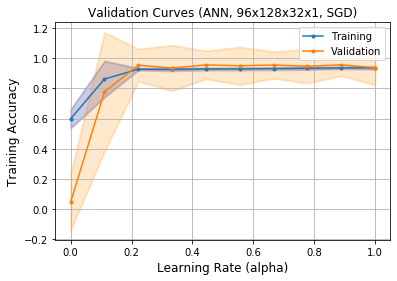

In [27]:
# SGD Optimizer
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

train_acc = []
val_acc = []
train_std = []
val_std = []

# Create model
model = Sequential()
model.add(Dense(96, input_dim=Xb_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
for alpha in np.linspace(0.0001, 1, 10):
    sgd = optimizers.SGD(lr=alpha, momentum=0.0, nesterov=False)
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_bal, y_bal, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
    train_acc_n = np.mean(history.history['acc'])
    train_std_n = np.std(history.history['acc'])
    val_acc_n = np.mean(history.history['val_acc'])
    val_std_n = np.std(history.history['val_acc'])
    
    # Append data
    train_acc.append(train_acc_n)
    val_acc.append(val_acc_n)
    train_std.append(train_std_n)
    val_std.append(val_std_n)
    
lw = 2    
param_range = np.linspace(0.0001, 1, 10)

fig = plt.figure()
plt.plot(param_range, train_acc, label = 'Training', marker = '.')
plt.fill_between(param_range, np.array(train_acc) - np.array(train_std),
                np.array(train_acc) + np.array(train_std), alpha=0.2,
                color="navy", lw=lw)
plt.plot(param_range, val_acc, label = 'Validation', marker = '.')
plt.fill_between(param_range, np.array(val_acc) - np.array(val_std),
                np.array(val_acc) + np.array(val_std), alpha=0.2,
                color="darkorange", lw=lw)
plt.title('Validation Curves (ANN, 96x128x32x1, SGD)', fontsize=12)
plt.ylabel('Training Accuracy', fontsize=12)
plt.xlabel('Learning Rate (alpha)', fontsize=12)
plt.grid(True)
plt.legend()

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  


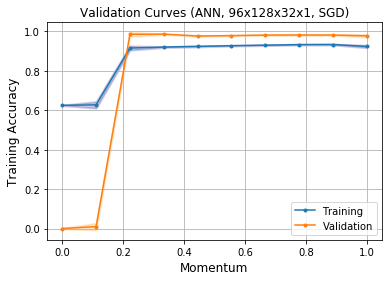

In [28]:
# SGD Optimizer
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
from keras import optimizers

train_acc = []
val_acc = []
train_std = []
val_std = []

# Create model
model = Sequential()
model.add(Dense(96, input_dim=Xb_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
for mom in np.linspace(0.0001, 1, 10):
    sgd = optimizers.SGD(lr=0.01, momentum=mom, nesterov=False)
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_bal, y_bal, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
    train_acc_n = np.mean(history.history['acc'])
    train_std_n = np.std(history.history['acc'])
    val_acc_n = np.mean(history.history['val_acc'])
    val_std_n = np.std(history.history['acc'])
    
    # Append data
    train_acc.append(train_acc_n)
    val_acc.append(val_acc_n)
    train_std.append(train_std_n)
    val_std.append(val_std_n)
    
lw = 2    
param_range = np.linspace(0.0001, 1, 10)

fig = plt.figure()
plt.plot(param_range, train_acc, label = 'Training', marker = '.')
plt.fill_between(param_range, np.array(train_acc) - np.array(train_std),
                np.array(train_acc) + np.array(train_std), alpha=0.2,
                color="navy", lw=lw)
plt.plot(param_range, val_acc, label = 'Validation', marker = '.')
plt.fill_between(param_range, np.array(val_acc) - np.array(val_std),
                np.array(val_acc) + np.array(val_std), alpha=0.2,
                color="darkorange", lw=lw)
plt.title('Validation Curves (ANN, 96x128x32x1, SGD)', fontsize=12)
plt.ylabel('Training Accuracy', fontsize=12)
plt.xlabel('Momentum', fontsize=12)
plt.grid(True)
plt.legend()

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]


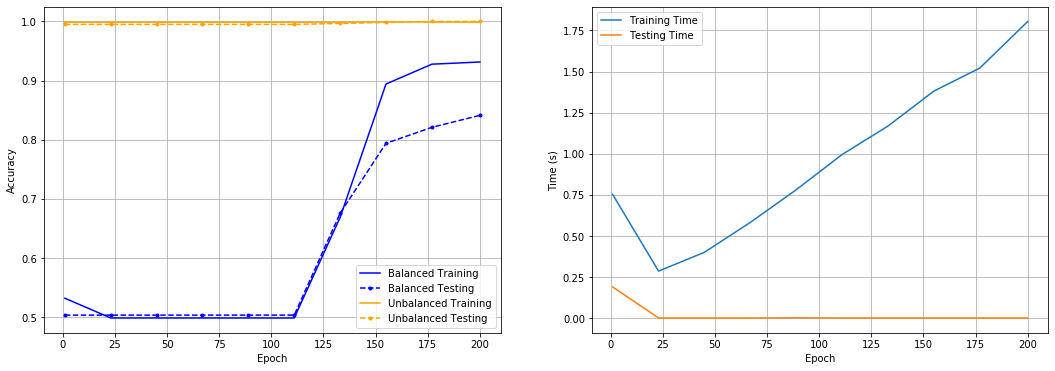

In [30]:
# Learning Curve using optimized hyperparameters
trainb_acc = []
testb_acc = []
trainu_acc = []
testu_acc = []
train_time = []
test_time = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=Xb_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

modelb = model
modelu = model


# Fit the model and test
n_epochs = np.linspace(1,200,10, dtype=int)

for n in n_epochs:
    train = time.time()
    historyb = modelb.fit(Xb_train, yb_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train
    
    historyu = modelu.fit(Xu_train, yu_train, epochs=n, batch_size=128, verbose = 0)
    
    test = time.time()
    resultsb = modelb.evaluate(Xb_test, yb_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    
    resultsu = modelu.evaluate(Xu_test, yu_test, batch_size=128, verbose = 0)

    #print(results[1])
    
    # Append data
    trainb_avg = np.mean(historyb.history['acc'])
    testb_avg = np.mean(resultsb[1])
    trainb_acc.append(trainb_avg)
    testb_acc.append(testb_avg)
    
    trainu_avg = np.mean(historyu.history['acc'])
    testu_avg = np.mean(resultsu[1])
    trainu_acc.append(trainu_avg)
    testu_acc.append(testu_avg)
    
    train_time.append(train_epoch)
    test_time.append(test_epoch)
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

# summarize history for accuracy
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, trainb_acc, label = 'Balanced Training', color = 'blue')
plt.plot(n_epochs, testb_acc, '--', label = 'Balanced Testing', color = 'blue', marker = '.')
plt.plot(n_epochs, trainu_acc, label = 'Unbalanced Training', color = 'orange')
plt.plot(n_epochs, testu_acc, '--', label = 'Unbalanced Testing', color = 'orange', marker = '.')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time, label = 'Training Time')
plt.plot(n_epochs, test_time, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()